In [5]:
pip install opendatasets

In [6]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/virajbagal/roco-dataset?select=all_data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: siddheshatkar
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/virajbagal/roco-dataset


100%|██████████| 6.19G/6.19G [01:20<00:00, 83.0MB/s]


In [3]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
# Read CSV dataset from Pandas
df_train = pd.read_csv('/content/roco-dataset/all_data/train/radiologytraindata.csv', delimiter=',') #, nrows = nRowsRead
df_train.dataframeName = '/content/roco-dataset/all_data/test/radiologytestdata.csv'
nRow, nCol = df_train.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 65450 rows and 3 columns


In [8]:
print(df_train.head())

           id                                    name  \
0  ROCO_00002          PMC4083729_AMHSR-4-14-g002.jpg   
1  ROCO_00003       PMC2837471_IJD2009-150251.001.jpg   
2  ROCO_00004  PMC2505281_11999_2007_30_Fig6_HTML.jpg   
3  ROCO_00005       PMC3745845_IJD2013-683423.005.jpg   
4  ROCO_00007   PMC4917066_amjcaserep-17-301-g001.jpg   

                                             caption  
0   Computed tomography scan in axial view showin...  
1   Bacterial contamination occurred after comple...  
2   The patient had residual paralysis of the han...  
3    Panoramic radiograph after immediate loading.\n  
4   Plain abdomen x-ray: Multiple air levels at t...  


In [9]:
df_train['images'] = "/kaggle/input/roco-dataset/all_data/train/radiology/images/" + df_train['name']
df_train.head()

,id,name,caption,images
0,ROCO_00002,PMC4083729_AMHSR-4-14-g002.jpg,Computed tomography scan in axial view showin...,/kaggle/input/roco-dataset/all_data/train/radi...
1,ROCO_00003,PMC2837471_IJD2009-150251.001.jpg,Bacterial contamination occurred after comple...,/kaggle/input/roco-dataset/all_data/train/radi...
2,ROCO_00004,PMC2505281_11999_2007_30_Fig6_HTML.jpg,The patient had residual paralysis of the han...,/kaggle/input/roco-dataset/all_data/train/radi...
3,ROCO_00005,PMC3745845_IJD2013-683423.005.jpg,Panoramic radiograph after immediate loading.\n,/kaggle/input/roco-dataset/all_data/train/radi...
4,ROCO_00007,PMC4917066_amjcaserep-17-301-g001.jpg,Plain abdomen x-ray: Multiple air levels at t...,/kaggle/input/roco-dataset/all_data/train/radi...


In [10]:
# Display basic information about the DataFrame
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65450 entries, 0 to 65449
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       65450 non-null  object
 1   name     65450 non-null  object
 2   caption  65450 non-null  object
 3   images   65450 non-null  object
dtypes: object(4)
memory usage: 2.0+ MB
None


NameError: name '_df_4' is not defined

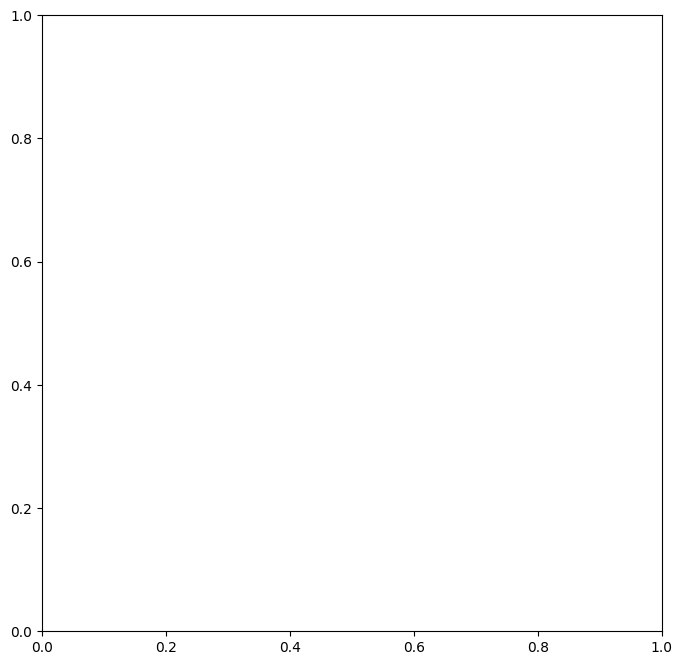

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['name'].value_counts()
    for x_label, grp in _df_4.groupby('id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('id')
_ = plt.ylabel('name')

In [12]:
# Display statistical summary of numerical columns
print(df_train.describe())

                id                            name  \
count        65450                           65450   
unique       65450                           65450   
top     ROCO_00002  PMC4083729_AMHSR-4-14-g002.jpg   
freq             1                               1   

                                 caption  \
count                              65450   
unique                             64772   
top      Initial panoramic radiograph.\n   
freq                                  19   

                                                   images  
count                                               65450  
unique                                              65450  
top     /kaggle/input/roco-dataset/all_data/train/radi...  
freq                                                    1  


In [13]:
# Display unique values for categorical columns
for column in df_train.select_dtypes(include=['object']).columns:
    print(f'Unique values in {column}: {df_train[column].unique()}')

Unique values in id: ['ROCO_00002' 'ROCO_00003' 'ROCO_00004' ... 'ROCO_81821' 'ROCO_81822'
 'ROCO_81823']
Unique values in name: ['PMC4083729_AMHSR-4-14-g002.jpg' 'PMC2837471_IJD2009-150251.001.jpg'
 'PMC2505281_11999_2007_30_Fig6_HTML.jpg' ...
 'PMC2974222_kjr-11-612-g001.jpg' 'PMC3532764_AJNS-7-151-g002.jpg'
 'PMC3509000_pone.0050319.g002.jpg']
Unique values in caption: [' Computed tomography scan in axial view showing obliteration of the left maxillary sinus\n'
 ' Bacterial contamination occurred after completion of root canal treatment in the tooth, which remained with a temporary filling for 15 month.\n'
 ' The patient had residual paralysis of the hand after poliomyelitis. It was necessary to stabilize the thumb with reference to the index finger. This was accomplished by placing a graft from the bone bank between the first and second metacarpals. The roentgenogram shows the complete healing of the graft one year later.\n'
 ...
 ' Primary pulmonary tuberculosis in 18-year-old boy

In [14]:
# Check for missing values
print(df_train.isnull().sum())

id         0
name       0
caption    0
images     0
dtype: int64


In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()

for column in df_train.select_dtypes(include=['object']).columns:
    df_train[column] = label_encoder.fit_transform(df_train[column])

In [18]:
X = df_train.drop(columns=['caption'])  # replace 'target_column' with the actual target column name
y = df_train['id']  # replace 'target_column' with the actual target column name


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (52360, 3)
Shape of X_test: (13090, 3)
Shape of y_train: (52360,)
Shape of y_test: (13090,)
